In [1]:
# dev
import sys
sys.path.append("..")

import pyparanoid.genomedb as gdb
import pyparanoid.genomeplot as gplot

In [2]:
### Load a list of strains that have been added to a genome database
### you've built using pyparanoid.genomedb methods.

strains = [line.rstrip() for line in open("../src/Brass.txt","r")]

In [3]:
### First, use the download_genbank_files() function to check if all 
### of the strains have genbank files and download the ones that are
### missing from RefSeq and Ensembl.


gdb.download_genbank_files(strains,"../../data/genomedb")

3 of 3 prokka genbank files available.
19 of 19 Ensembl genbank files available.
65 of 65 refseq files available.


In [4]:
### Now let's generate a list of strains and locus tags for a specific
### PyParanoid group that we are interested in.

from Bio import SeqIO

o = open("../src/locus_tag_list.txt",'w')

for seq in SeqIO.parse(open("../../data/Pseudo/prop_homolog_faa/group_22008.faa",'r'),'fasta'):
    vals = seq.id.split("|")
    if vals[0] in strains:
        o.write("{}\t{}\n".format(vals[0],vals[1]))
o.close()

!head ../src/locus_tag_list.txt

## You can modify this file to add strains

pseudomonas_sp_root401	KQW30295
pseudomonas_fluorescens_gca_001307275	ALI10530
pseudomonas_sp__nfacc24_1	WP_092475399.1
pseudomonas_sp__nfacc37_1	WP_092164970.1
pseudomonas_sp__nfacc04_2	WP_072405401.1
pseudomonas_sp__nfacc15_1	WP_092200579.1
pseudomonas_sp__nfacc13_1	WP_092256805.1
pseudomonas_sp__nfacc14	WP_092200579.1
pseudomonas_fluorescens_gca_001468775	WP_058544867.1
pseudomonas_sp__pf153	WP_053150786.1


In [5]:
## This function will plot genomic regions from the strains in "locus_tag_list.txt", use the
## genbank files in "genomedb", and color the results based on PyParanoid group membership.

## This step can take a while...eventually I'm going to come back to this to optimize the
## homolog searching.


GD = gplot.plot_genomic_regions("../src/locus_tag_list.txt","../../data/genomedb", \
                                "../../data/Pseudo")

In [6]:
GD.draw(x=0.02,format="linear", orientation = "landscape", track_size=0.35, fragments=1, \
        start=0, end=52000, pagesize=(1000,2000))
GD.write("all_group22008.png", "PNG")

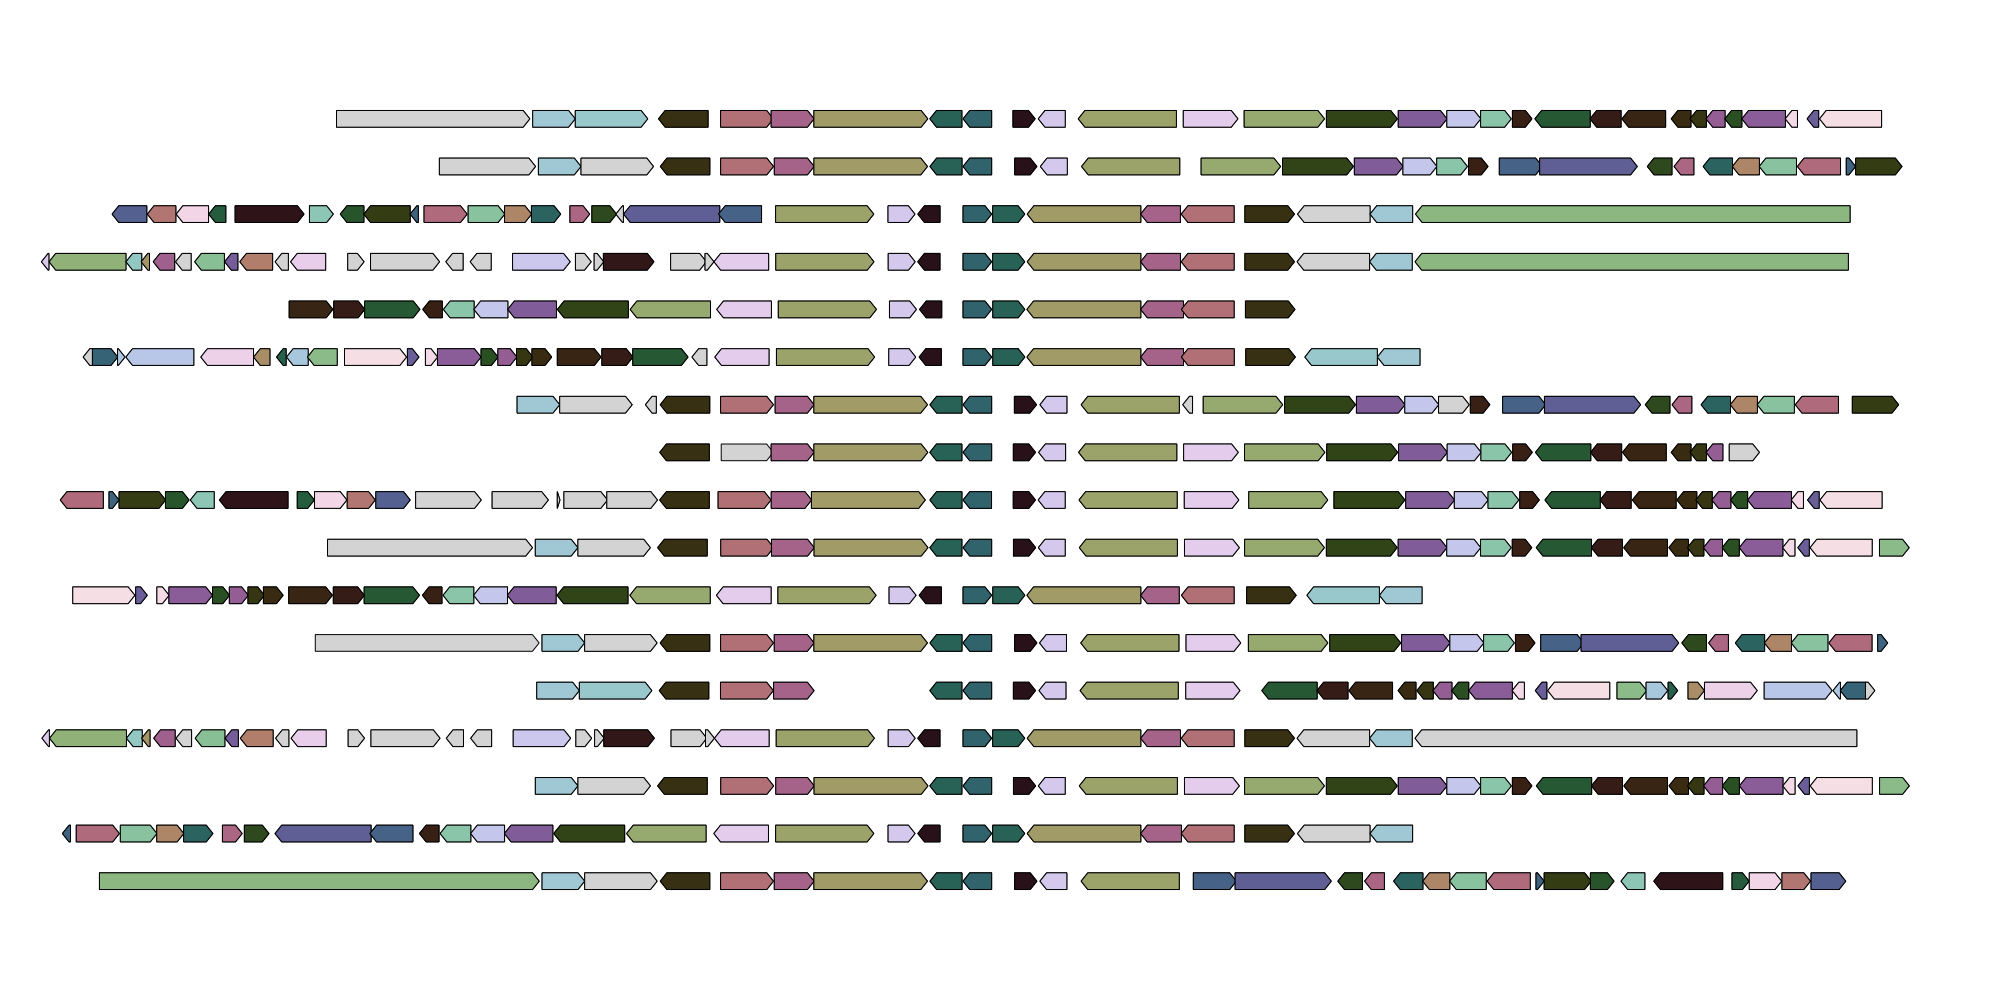

In [7]:
from IPython.display import Image
Image(filename='all_group22008.png')

In [8]:
## Optionally, you can specify a set of gene groups to highlight in green as well as a custom 
## size window span to view a larger chunk of the genome.

## Setting labels=True is sometimes helpful for smaller plots, but generally leads to clutter 
## when you are looking at many genomes.

highlight = ["group_16803","group_22008","group_15086","group_06700","group_10985",\
             "group_09490","group_10988"]

!head -n 5 ../src/locus_tag_list.txt > ../src/little_list.txt

GD2 = gplot.plot_genomic_regions("../src/little_list.txt","../../data/genomedb",\
    "../../data/Pseudo",span=90000,hl_groups=highlight,labels=True)


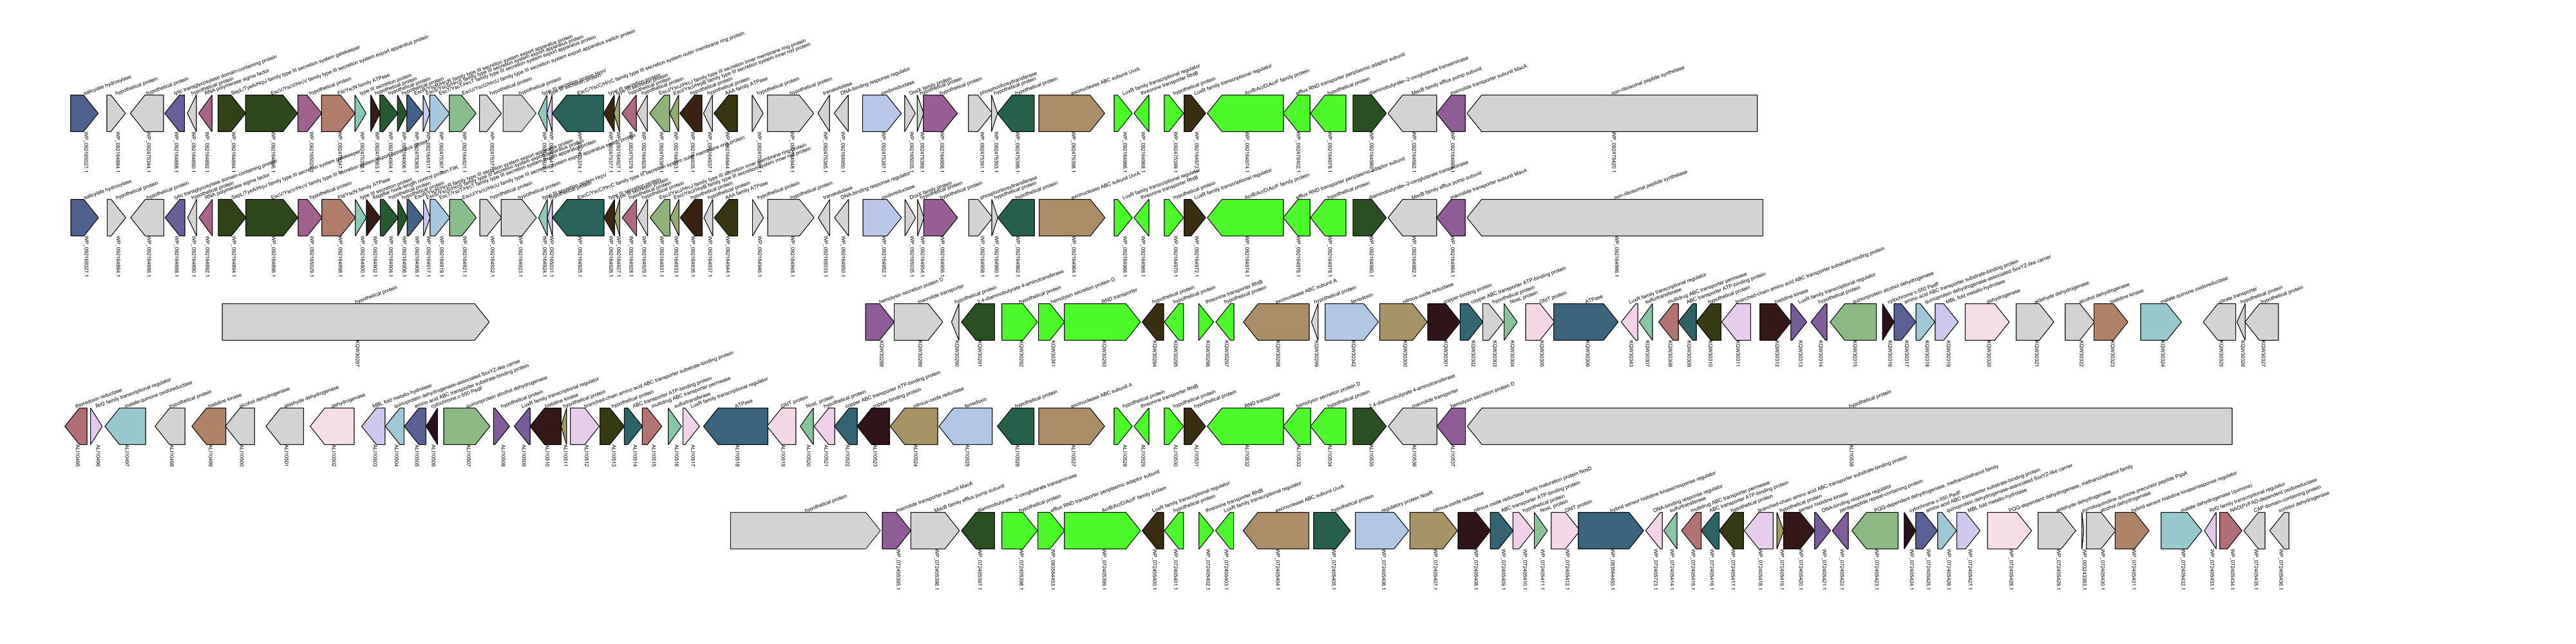

In [12]:
GD2.draw(x=0.02,format="linear", orientation = "landscape", track_size=0.35, fragments=1, \
        start=0, end=100000, pagesize=(1000,4000))
GD2.write("highlighted_group22008.png", "PNG")
Image(filename='highlighted_group22008.png')